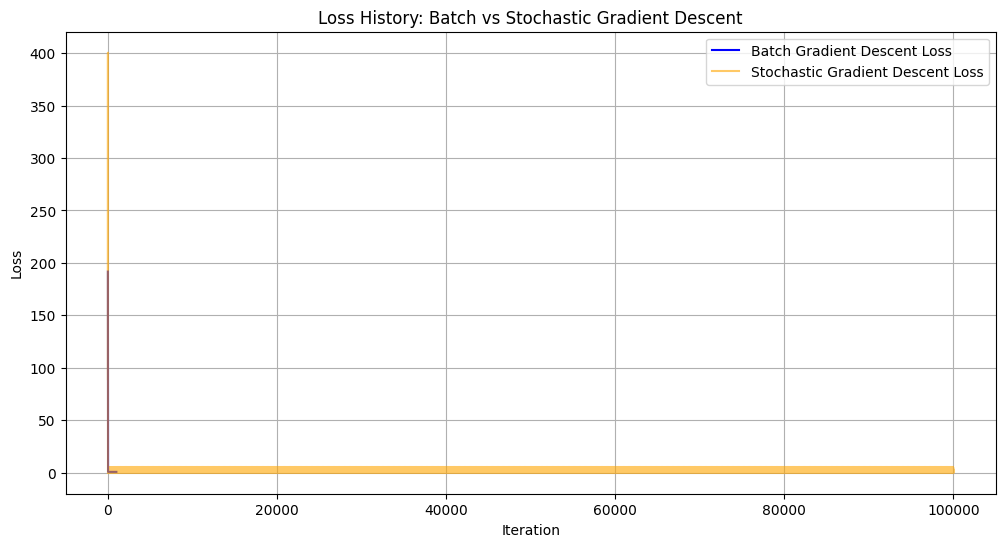

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Generate synthetic data
np.random.seed(42)
X = np.random.rand(100, 1) * 10  # 100 data points
y = 2.5 * X + np.random.randn(100, 1)  # Linear relation with noise

# Delta Learning Rule implementation for Batch Gradient Descent
class BatchGradientDescent:
    def __init__(self, learning_rate=0.01, n_iterations=1000):
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        m, n = X.shape
        self.weights = np.zeros((n, 1))
        self.bias = 0
        self.loss_history = []

        for _ in range(self.n_iterations):
            y_pred = X.dot(self.weights) + self.bias
            error = y_pred - y
            loss = np.mean(error ** 2)
            self.loss_history.append(loss)

            # Gradient calculation
            dw = (1/m) * X.T.dot(error)
            db = (1/m) * np.sum(error)

            # Update weights and bias
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

        return self.weights, self.bias

# Delta Learning Rule implementation for Stochastic Gradient Descent
class StochasticGradientDescent:
    def __init__(self, learning_rate=0.01, n_iterations=1000):
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        m, n = X.shape
        self.weights = np.zeros((n, 1))
        self.bias = 0
        self.loss_history = []

        for _ in range(self.n_iterations):
            for i in range(m):
                xi = X[i]
                yi = y[i]
                
                # Prediction
                y_pred = xi.dot(self.weights) + self.bias
                error = y_pred - yi
                loss = np.mean(error ** 2)
                self.loss_history.append(loss)

                # Gradient calculation
                dw = xi.T.dot(error)
                db = np.sum(error)

                # Update weights and bias
                self.weights -= self.learning_rate * dw
                self.bias -= self.learning_rate * db

        return self.weights, self.bias

# Instantiate and train both models
batch_model = BatchGradientDescent(learning_rate=0.01, n_iterations=1000)
batch_weights, batch_bias = batch_model.fit(X, y)

sgd_model = StochasticGradientDescent(learning_rate=0.01, n_iterations=1000)
sgd_weights, sgd_bias = sgd_model.fit(X, y)

# Plotting the loss history
plt.figure(figsize=(12, 6))
plt.plot(batch_model.loss_history, label='Batch Gradient Descent Loss', color='blue')
plt.plot(sgd_model.loss_history, label='Stochastic Gradient Descent Loss', color='orange', alpha=0.6)
plt.title('Loss History: Batch vs Stochastic Gradient Descent')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()